<a href="https://colab.research.google.com/github/Polentino-11/Tarea-5_Proyecto_An-lisis_de_Datos/blob/main/Ejercicio_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1 to 60
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  60 non-null     int64 
 1   Survived     60 non-null     int64 
 2   Pclass       60 non-null     object
 3   Name         60 non-null     object
 4   Sex          60 non-null     object
 5   Age          60 non-null     int64 
 6   SibSp        60 non-null     int64 
 7   Parch        60 non-null     int64 
 8   Ticket       59 non-null     object
 9   Fare         54 non-null     object
 10  Cabin        18 non-null     object
 11  Embarked     48 non-null     object
dtypes: int64(5), object(7)
memory usage: 6.1+ KB
None

Resumen estadístico del dataset:
       PassengerId   Survived        Age      SibSp          Parch
count    60.000000  60.000000  60.000000  60.000000      60.000000
mean      0.500000   2.366667  24.383333   0.350000   40704.266667
std       0.

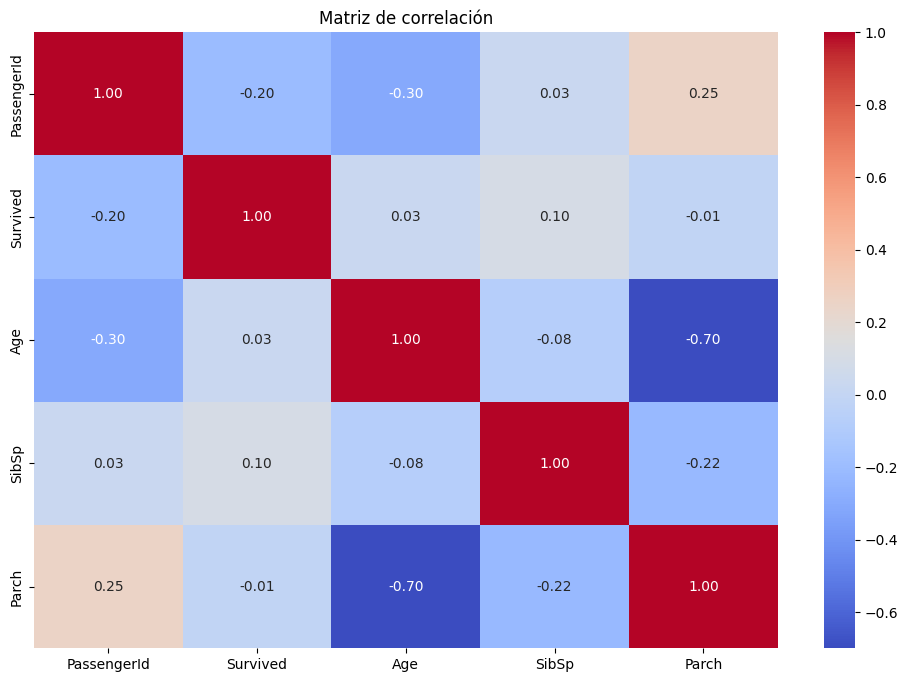

<ipython-input-34-3cab67784a18>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
<ipython-input-34-3cab67784a18>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X_numeric.columns] = X_numeric
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklea

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex           0
Embarked_S    0
dtype: int64

Características más relevantes:
  Feature     Score
3     Sex  0.357143
1   SibSp  0.042017
0     Age  0.041445
2   Parch       NaN

Métricas de evaluación del modelo:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Precisión: 1.0


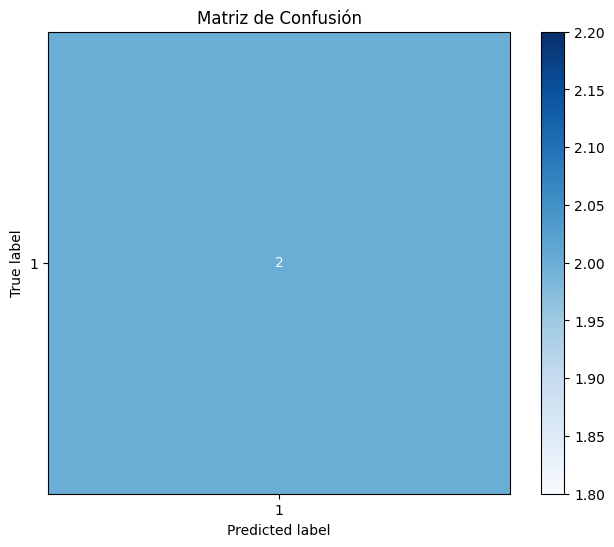

Clases en y_test: {1}
Clases en y_test: Survived
2    1
1    1
Name: count, dtype: int64

Métricas de evaluación del modelo:
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Precisión: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


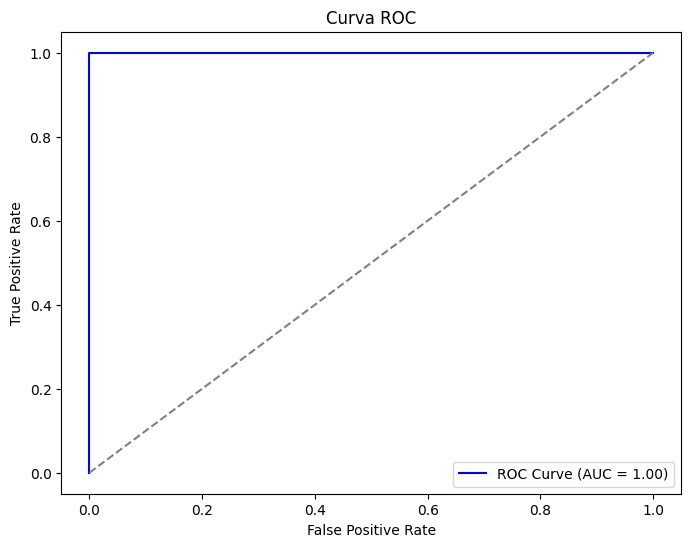

AUC: 1.00
Columnas originales de X_train antes del escalado: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked_S'], dtype='object')
Número de columnas originales: 7
Columnas de X_train después de escalado: Index(['Age', 'SibSp', 'Parch', 'Sex'], dtype='object')
Número de columnas después de escalado: 4
Importancia de las Características:
  Feature  Importance
3     Sex    0.600782
0     Age    0.324424
1   SibSp    0.079662
2   Parch    0.000000

Ejemplos de predicciones incorrectas:
   Pclass  Age  SibSp  Parch  Fare  Sex  Embarked_S  Actual  Predicted
51  McVey   39      1      0  53.1    1       False       2          1


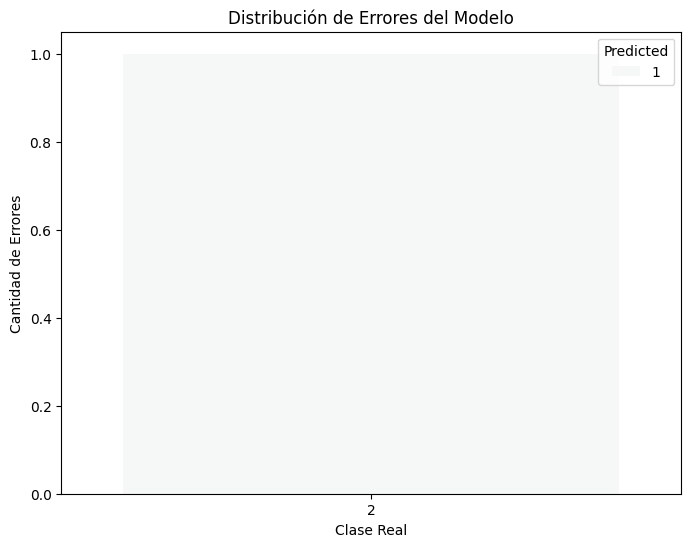

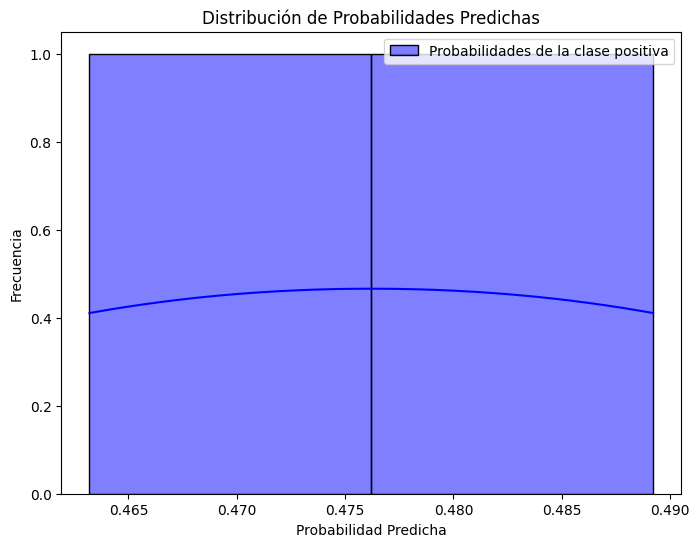

<ipython-input-34-3cab67784a18>:308: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='viridis')


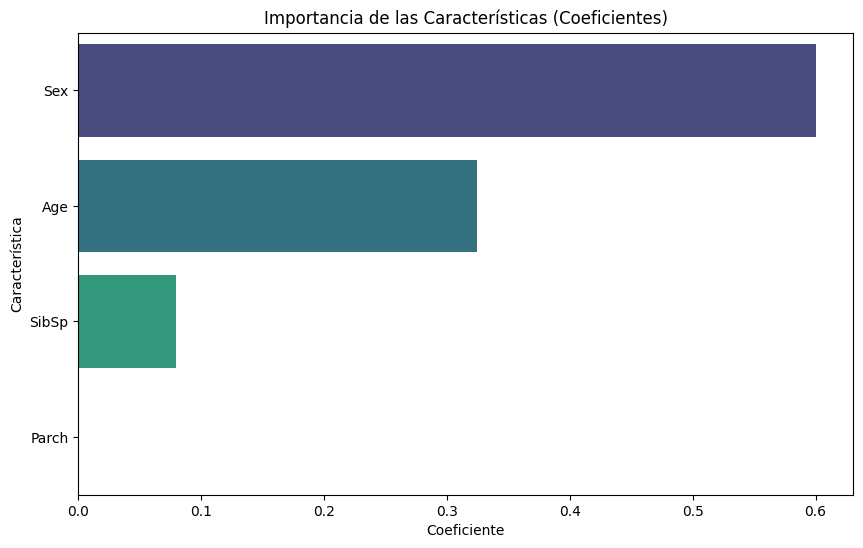


Ejemplos de errores del modelo:
   Pclass  Age  SibSp  Parch  Fare  Sex  Embarked_S  True  Predicted
51  McVey   39      1      0  53.1    1       False     2          1


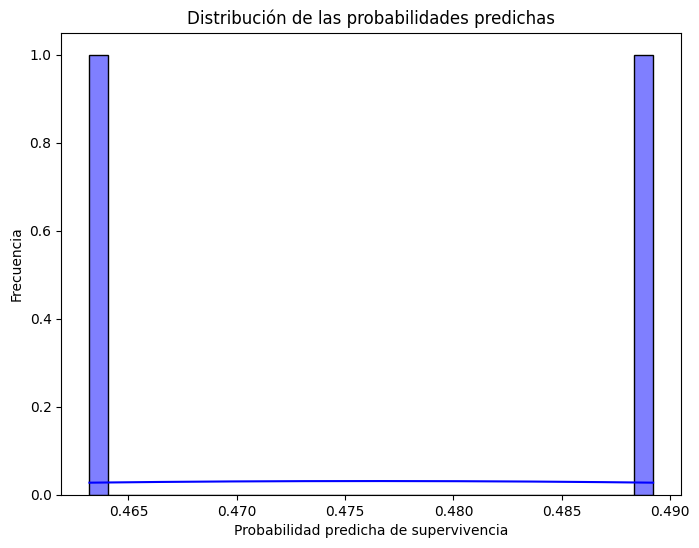

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score


# Cargar el dataset:
df = pd.read_csv("Titanic_Dataset.csv")

# Paso #1. Análisis exploratorio de los datos:
# Obtener información general del dataset:
print("\nInformación del dataset:")
print(df.info())

# Resumen estadístico:
print("\nResumen estadístico del dataset:")
print(df.describe())

# Comprobar valores nulos:
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Análisis exploratorio de los datos - Correlación entre variables.
# Seleccionar solo las columnas numéricas para calcular la correlación:
df_numeric = df.select_dtypes(include=[np.number])

# Calcular y visualizar la matriz de correlación:
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()


# Paso #2. Preprocesamiento de los datos:

# Eliminar filas con valores nulos en cualquier columna:
df = df.dropna()

# Convertir las variables categóricas en variables numéricas:
# Convertir "Sex" (masculino=0, femenino=1).
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convertir "Embarked" en variables dummies:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Asegurarnos de que no hay valores nulos en X.
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex'] + [col for col in df.columns if 'Embarked' in col]]
y = df['Survived']

# Filtrar solo las columnas numéricas:
X_numeric = X.select_dtypes(include=[np.number])

# Llenar valores nulos solo en las columnas numéricas con la mediana:
X_numeric = X_numeric.fillna(X_numeric.median())

# Asignar las columnas numéricas modificadas de vuelta a X.
X[X_numeric.columns] = X_numeric

# Verificamos si hay valores nulos en X después de aplicar la mediana:
print(X.isnull().sum())


# Paso #3. Selección de características más relevantes:
# Seleccionar las características para el modelo:

# Se asegura de solo seleccionar columnas numéricas:
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex'] + [col for col in df.columns if 'Embarked' in col]]

# Filtrar solo las columnas numéricas en X.
X_numeric = X.select_dtypes(include=[np.number])

y = df['Survived']

# Selección de las mejores características usando SelectKBest.
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_numeric, y)

# Mostrar las características más relevantes:
scores = pd.DataFrame({'Feature': X_numeric.columns, 'Score': selector.scores_})
print("\nCaracterísticas más relevantes:")
print(scores.sort_values(by='Score', ascending=False))


# Paso #4. Dividir el dataset en Train y Test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Paso #5. Entrenar el modelo:

# Asegurarnos de que solo se usen columnas numéricas para el escalado:
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Estandarizamos las características para mejorar el rendimiento del modelo:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Crear y entrenar el modelo:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)



# Paso #6. Evaluar el desempeño del modelo:
from sklearn.metrics import classification_report

# Realizar predicciones:
y_pred = model.predict(X_test_scaled)

# Mostrar las métricas de evaluación:
print("\nMétricas de evaluación del modelo:")
print(classification_report(y_test, y_pred))

# Mostrar la precisión del modelo:
print(f"Precisión: {model.score(X_test_scaled, y_test)}")



# Paso $7. Realizar las diferentes gráficas del Modelo:
# Evaluar el desempeño del modelo

# === Visualización adicional ===

# Matriz de Confusión:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusión:
cm = confusion_matrix(y_test, y_pred)

# Crear etiquetas para la matriz de confusión:
labels = sorted(list(set(y_test.unique()).union(set(y_pred))))

# Visualizar la matriz de confusión:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)
plt.title("Matriz de Confusión")
plt.show()




# Curva ROC y AUC:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

print(f"Clases en y_test: {set(y_test)}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Clases en y_test: {y_test.value_counts()}")

# Realizar predicciones:
y_pred = model.predict(X_test_scaled)

# Mostrar las métricas de evaluación:
print("\nMétricas de evaluación del modelo:")
print(classification_report(y_test, y_pred))

# Mostrar la precisión del modelo:
print(f"Precisión: {model.score(X_test_scaled, y_test)}")


# Usamos las probabilidades de predicción para obtener la curva ROC:
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Tomamos solo la columna de la clase positiva (1)

# Calcular la curva ROC:
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=2)  # Pasamos pos_label=2 si las clases son 1 y 2

# Calcular el AUC (Área Bajo la Curva):
auc = roc_auc_score(y_test, y_proba)

# Visualizar la curva ROC:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia
plt.title("Curva ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC:
print(f"AUC: {auc:.2f}")




# Importancia de las Características:

# Verificamos las columnas antes del preprocesamiento y las de X_train después del escalado:
print("Columnas originales de X_train antes del escalado:", X_train.columns)
print("Número de columnas originales:", len(X_train.columns))

# Escalamos las características, para verificar, las columnas de X_train deben mantenerse.
X_train_numeric = X_train.select_dtypes(include=[np.number])  # Solo columnas numéricas.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Imprimimos las columnas después de escalado para verificar si algo cambió:
print("Columnas de X_train después de escalado:", X_train_numeric.columns)
print("Número de columnas después de escalado:", len(X_train_scaled[0]))

# Ahora se obtiene las importancias de las características del modelo:
importances = model.coef_[0]

# Se verifica que el número de columnas coincida con el número de coeficientes:
assert len(X_train_numeric.columns) == len(importances), f"El número de columnas ({len(X_train_numeric.columns)}) y coeficientes ({len(importances)}) no coincide."

# Se debe crear un DataFrame para visualizar las características y sus importancias:
feature_importance = pd.DataFrame({
    'Feature': X_train_numeric.columns,  # Aseguramos que las columnas de X_train estén presentes
    'Importance': importances
})

# Ordenar las características por importancia:
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes:
print("Importancia de las Características:")
print(feature_importance)





# Análisis de los Errores del Modelo:
# Calcular los errores (predicciones incorrectas).
errors = y_test != y_pred

# Mostrar los ejemplos de errores:
print("\nEjemplos de predicciones incorrectas:")
incorrect_examples = X_test[errors]
incorrect_predictions = pd.DataFrame({'Actual': y_test[errors], 'Predicted': y_pred[errors]})
print(incorrect_examples.join(incorrect_predictions))

# Analizar la distribución de los errores:
plt.figure(figsize=(8, 6))
sns.countplot(x=incorrect_predictions['Actual'], hue=incorrect_predictions['Predicted'], palette='RdBu')
plt.title("Distribución de Errores del Modelo")
plt.xlabel("Clase Real")
plt.ylabel("Cantidad de Errores")
plt.show()





# Distribución de Probabilidades Predichas:
# Obtener las probabilidades predichas:
y_proba = model.predict_proba(X_test_scaled)

# Visualizar la distribución de probabilidades predichas para la clase positiva (1).
plt.figure(figsize=(8, 6))
sns.histplot(y_proba[:, 1], kde=True, color='blue', label="Probabilidades de la clase positiva")
plt.title("Distribución de Probabilidades Predichas")
plt.xlabel("Probabilidad Predicha")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


# End.
# By: EdwenPolentino.






